# Introduction

## (Men take more risks, but women are better at surviving)

This is the project 2 of Data Anylist Nanodegree, 2017. it will be evaluated by this requirements
https://review.udacity.com/#!/rubrics/107/view
We will try here to study the Titanic data of 891 passengers in order to do wrangling and bring useful findings at the end <br>
check this video
https://www.youtube.com/watch?v=E8OQAdQlljE


---------------------
##### Helpful tools

It will be very helpful to import pandas for this case because it will make our task very easy especially with dealing with csv files

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-------
Now, we will read the csv data.

In [3]:
# get titanic data
data = pd.read_csv('titanic-data.csv')

# preview the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# calculating the missing value in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1- Questioning Stage
After taking a look at the data, we can see there is a label of this data "Survived" represents whether or not the passenger died. Thus, I came with this qestion.
##### how is the percentage of being survived varying with the passenger gender and age?


--------

-------------------------
## 2 - Wrangling Stage
#### ( acquisition, cleaning)

One of the most important stages of data analyst is cleaning data, so sometimes we might need to transfer some columns to other expression or delete unuseful columns or fixed missing value. <br>
Right now I suggest removing unuseful columns like Name, SibSp, Parch, Fare, Ticket, and PassengerId becouse they are not nassesry in our case. <br>
In addition, there is 687 missing value in Cabin column wich is considerd as a high percentage 77%, so figuring out the missing values will be insignificant becouse 77% values of this column are missing. <br>

In [5]:
data = data.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Fare','Ticket','Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [6]:
pd.DataFrame.describe(data)  # = data.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


### Fix the missing values
Since we are going to use 'Age' column, We shall fill the missing value in 'Age'. For the Age, we will use the mean value for each gender and we will fill male missing value with Age male mean, and the same thing with female missing value.

resource (https://chrisalbon.com/python/pandas_missing_data.html)

In [7]:
# First, we will check the mean of male and female Age
mean_missing_Age_value = data[['Age', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)
print mean_missing_Age_value

      Sex        Age
0  female  27.915709
1    male  30.726645


In [8]:
# Fill in missing in Age with each Sex's mean value of Age
data['Age'].fillna(data.groupby('Sex')['Age'].transform('mean'), inplace=True)

In [9]:
# we can check the new values by printing data
#data

In [10]:
# Check again the mean of male and female Age
mean_missing_Age_value = data[['Age', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)
print mean_missing_Age_value

      Sex        Age
0  female  27.915709
1    male  30.726645


We can ensure that the new values that are added to the missing values
don't change the mean of male and female Age

In [11]:
print data.count()
print "\n \n"
print " The number of missing value for each variable"
print data.isnull().sum()

Survived    891
Pclass      891
Sex         891
Age         891
Embarked    889
dtype: int64

 

 The number of missing value for each variable
Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64


## 2 - Explore
#### ( building intuition, finding patterns)


Now, we are going to answer our qestion

In [12]:
grouped_data = data.groupby('Sex')
print grouped_data.sum()

        Survived  Pclass           Age
Sex                                   
female       233     678   8765.532567
male         109    1379  17729.273929



------------------



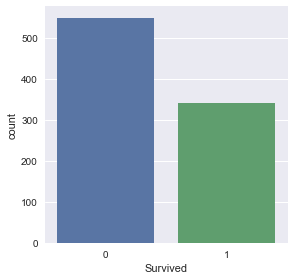

In [17]:
sns.factorplot('Survived',data = data,kind='count')

In [32]:
# the persentage of overall surviving passenger
per_sur = data['Survived'].mean()

print " the persentage of overall surviving passenger is {} %".format(float(per_sur)*100)

 the persentage of overall surviving passenger is 38.3838383838 %


This percentage 38.4% shows whether the passenger will be survived or not without any consideration of his/her age, class, gender, and other facts.

_____


In [18]:
data['Age'].describe()

count    891.000000
mean      29.736034
std       13.014897
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

(array([  44.,   20.,   19.,   96.,  122.,  161.,  212.,   67.,   47.,
          39.,   24.,   18.,   14.,    3.,    4.,    1.]),
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 16 Patch objects>)

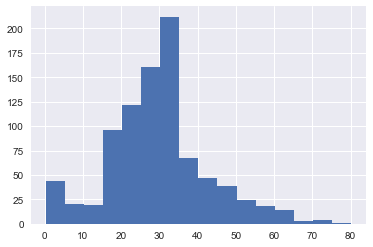

In [19]:
plt.hist(data.Age,bins=16)

#### Categorize the Age value

It will be very helpfull to group the age values into 3 to 5

In [20]:
# add new column for grouping Age
age = data['Age']
def convert_age(age):
    if age >= 61:
        return 'E' #'61 to 80 '
    if age >= 46:
        return 'D' #' 46 to 60'
    if age >= 31:
        return 'C' #'31 to 45'
    if age >= 16:
        return 'B' #'16 to 30'
    else:
        return 'A' #'0 to 15'

age = age.apply(convert_age)

In [21]:
data['age_conv'] = age
data.head()

,Survived,Pclass,Sex,Age,Embarked,age_conv
0,0,3,male,22.0,S,B
1,1,1,female,38.0,C,C
2,1,3,female,26.0,S,B
3,1,1,female,35.0,S,C
4,0,3,male,35.0,S,C


In [22]:
data['age_conv'].count()

891

In [23]:
x_data = data[['age_conv', 'Survived']].groupby(['age_conv'], as_index=False).mean().sort_values(by='age_conv', ascending=True)

print x_data

  age_conv  Survived
0        A  0.590361
1        B  0.334653
2        C  0.425743
3        D  0.417722
4        E  0.227273


In [24]:
df = data.groupby(['age_conv', 'Survived']).size().reset_index().rename(columns={0:'count'})
print df

  age_conv  Survived  count
0        A         0     34
1        A         1     49
2        B         0    336
3        B         1    169
4        C         0    116
5        C         1     86
6        D         0     46
7        D         1     33
8        E         0     17
9        E         1      5


In [25]:
# more detailes
df = data.groupby(['age_conv', 'Sex', 'Survived']).size().reset_index().rename(columns={0:'count'})
print df

   age_conv     Sex  Survived  count
0         A  female         0     15
1         A  female         1     28
2         A    male         0     19
3         A    male         1     21
4         B  female         0     47
5         B  female         1    122
6         B    male         0    289
7         B    male         1     47
8         C  female         0     15
9         C  female         1     57
10        C    male         0    101
11        C    male         1     29
12        D  female         0      4
13        D  female         1     23
14        D    male         0     42
15        D    male         1     10
16        E  female         1      3
17        E    male         0     17
18        E    male         1      2


In [26]:
# the male survival rate percentage
xr = [2,6,10,14,17]
y =[]
for i in xr:
    r = i
    z = r + 1
    y.append(100 * float(df['count'][z])/(df['count'][r]+df['count'][z]))

print y

[52.5, 13.988095238095237, 22.307692307692307, 19.23076923076923, 10.526315789473685]


In [27]:
# the feamle survival rate percentage
xr = [0,4,8,12]
y =[]
for i in xr:
    r = i
    z = r + 1
    y.append(100 * float(df['count'][z])/(df['count'][r]+df['count'][z]))

print y

[65.11627906976744, 72.18934911242603, 79.16666666666667, 85.18518518518519]


In [33]:
# the overall survival rate of male and female passengers
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


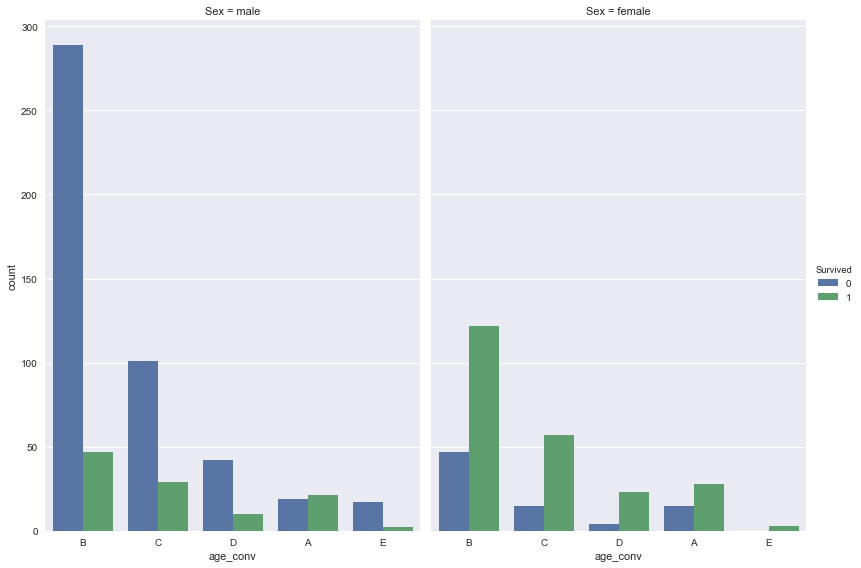

In [34]:
import seaborn as sns
g = sns.factorplot(x="age_conv", hue="Survived", col="Sex", data=data, kind="count", size=8, aspect=.7)

Now, we can answer our question "how is the percentage of being survived varying with the passenger gender and age?"

we can see what variables that can affect the survival percentage to be positive or negative based on passenger's gender and age

The the statistics and graphs above shows that : <br>
1- The female passengers in all age categories have a higher survival rate than males <br>
2- The survival rate of female passengers ranges from 65 to 100 in all age categories, where the average is 74 % <br>
3- The survival rate of male passengers ranges from 10 to 23 in all age categories except the children category " 0 to 15 years" that has 52.5 % of survival rate <br>

## Conclusion

The data statistics show that female passengers are the luckier passengers in Titanic, it might be because the nature of life requires men to protect women for many reasons some of which are: women are the caretakers of children, men are ready to scarify their life for their family, men can take risk more than women.